<a href="https://colab.research.google.com/github/AVDC-Sebastien/AIAS-Assignment/blob/main/AIAS_Assignment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the different library we are going to need

In [ ]:
!wget https://github.com/AVDC-Sebastien/AIAS-Assignment/blob/afb20edf040ba964f33c47cc4dee7d775e785d92/Assignment%20data/Assignment_data.zip

--2024-01-21 16:53:38--  https://github.com/AVDC-Sebastien/AIAS-Assignment/blob/afb20edf040ba964f33c47cc4dee7d775e785d92/Assignment%20data/Assignment_data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4818 (4.7K) [text/plain]
Saving to: ‘Assignment_data.zip’

Assignment_data.zip 100%[===================>]   4.71K  --.-KB/s    in 0s      

2024-01-21 16:53:38 (65.4 MB/s) - ‘Assignment_data.zip’ saved [4818/4818]



In [ ]:
!file /content/Assignment_data.zip -b
!cat /content/Assignment_data.zip

JSON data
{"payload":{"allShortcutsEnabled":false,"fileTree":{"Assignment data":{"items":[{"name":"data","path":"Assignment data/data","contentType":"directory"},{"name":"Assignment_data.zip","path":"Assignment data/Assignment_data.zip","contentType":"file"}],"totalCount":2},"":{"items":[{"name":"Assignment data","path":"Assignment data","contentType":"directory"},{"name":"AIAS - Assignment 2023_2024.pdf","path":"AIAS - Assignment 2023_2024.pdf","contentType":"file"}],"totalCount":2}},"fileTreeProcessingTime":2.796599,"foldersToFetch":[],"reducedMotionEnabled":null,"repo":{"id":745221625,"defaultBranch":"main","name":"AIAS-Assignment","ownerLogin":"AVDC-Sebastien","currentUserCanPush":false,"isFork":false,"isEmpty":false,"createdAt":"2024-01-18T21:55:47.000Z","ownerAvatar":"https://avatars.githubusercontent.com/u/155736383?v=4","public":true,"private":false,"isOrgOwned":false},"symbolsExpanded":false,"treeExpanded":true,"refInfo":{"name":"afb20edf040ba964f33c47cc4dee7d775e785d92","list

In [ ]:
import zipfile
with zipfile.ZipFile('/content/Assignment_data.zip', "r") as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Load the data set

In [ ]:
image_path = '/content/2018.jpg'
image = cv2.imread(image_path)
print(image.shape)

flat_image = np.float32(image.reshape((-1,3)))

(481, 321, 3)


In [ ]:
# also try GPB-OWT-UCM code
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)

img = []

for i in range(15,25):
  ms = MeanShift(bandwidth=i, bin_seeding=True)
  ms.fit(flat_image)
  labeled = ms.labels_
  # get number of segments
  segments = np.unique(labeled)
  print('Number of segments: ', segments.shape[0])

  # get the average color of each segment
  total = np.zeros((segments.shape[0], 3), dtype=float)
  count = np.zeros(total.shape, dtype=float)
  for i, label in enumerate(labeled):
      total[label] = total[label] + flat_image[i]
      count[label] += 1
  avg = total/count
  avg = np.uint8(avg)

# cast the labeled image into the corresponding average color
  res = avg[labeled]
  result = res.reshape((image.shape))

  img.append(result)

Number of segments:  15
Number of segments:  13


In [ ]:
print(bandwidth)

19.200069082092917


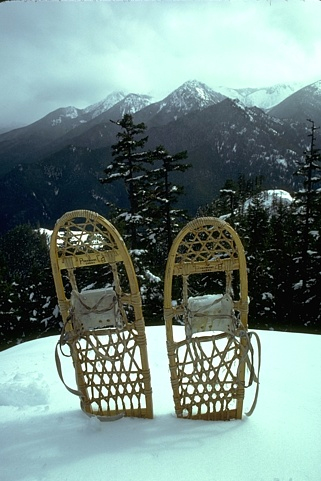

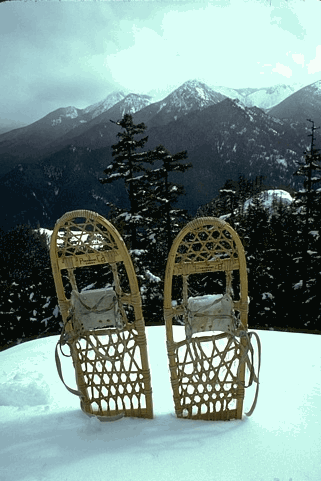

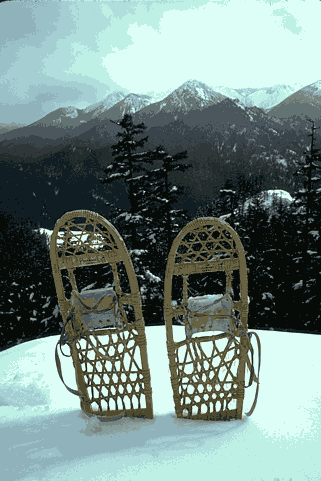

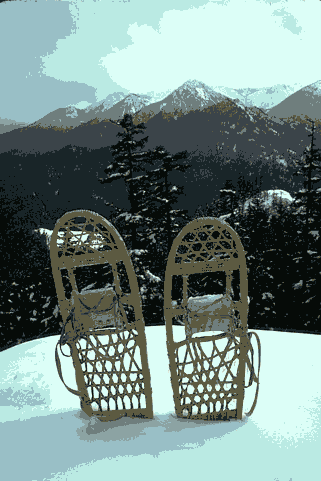

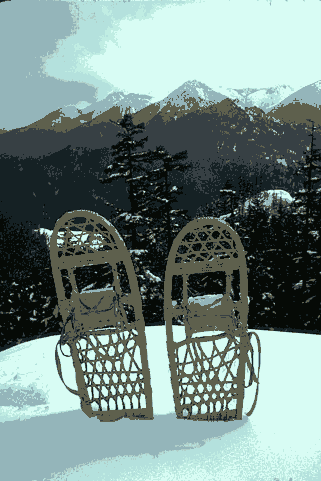

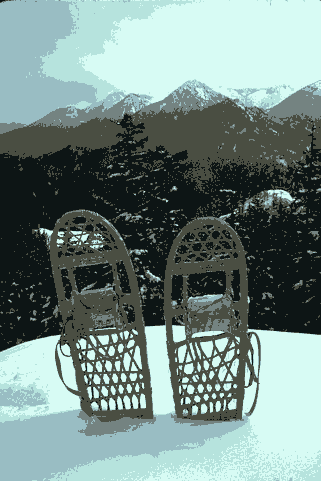

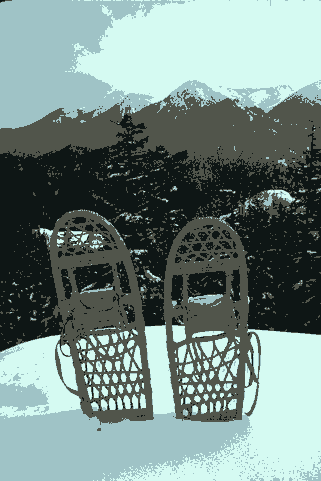

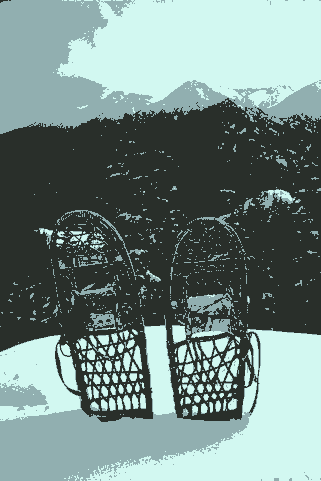

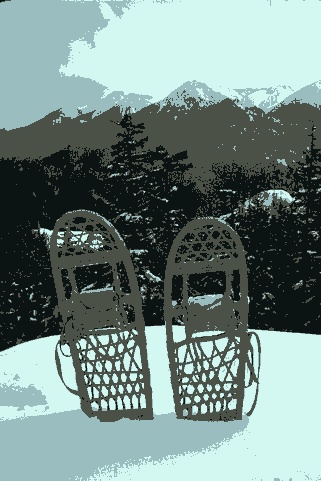

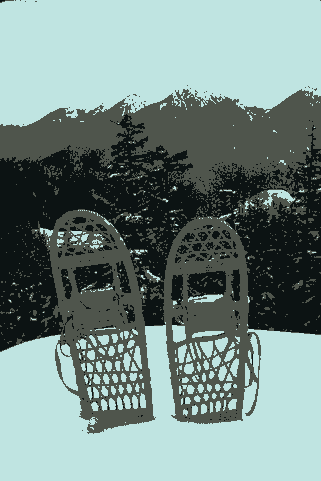

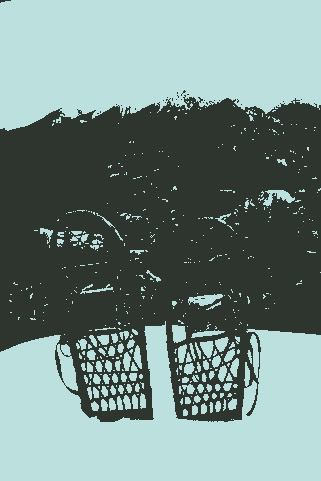

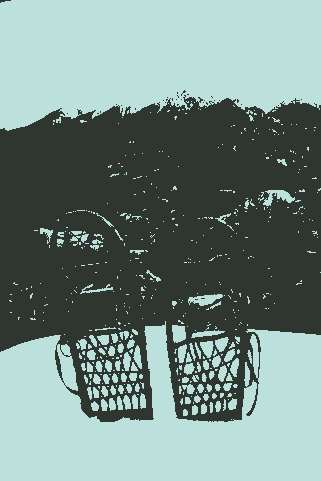

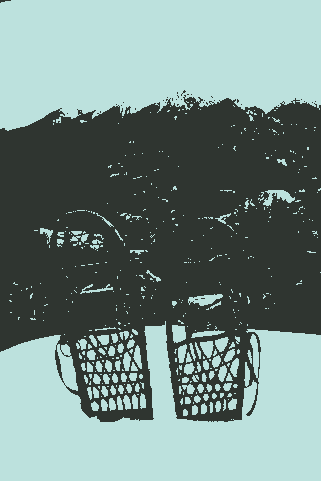

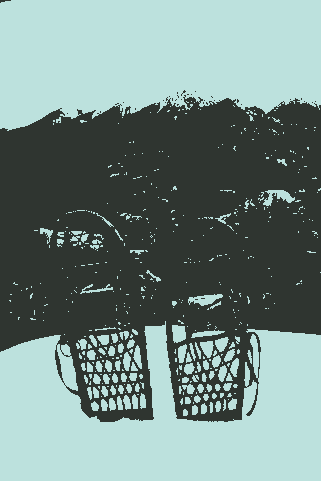

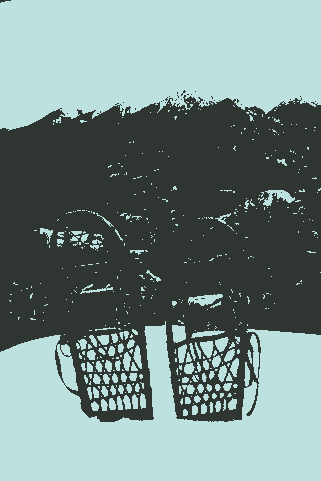

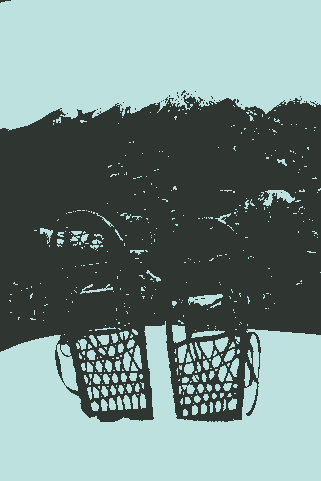

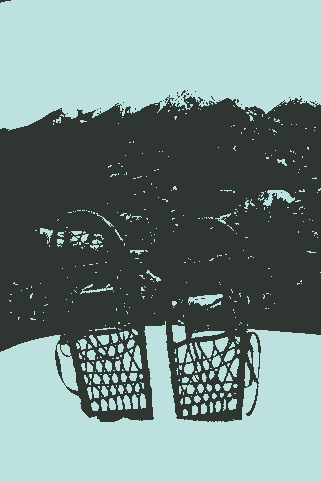

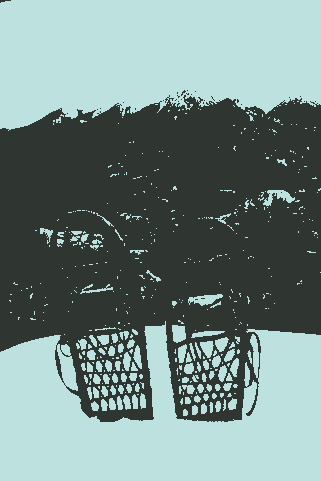

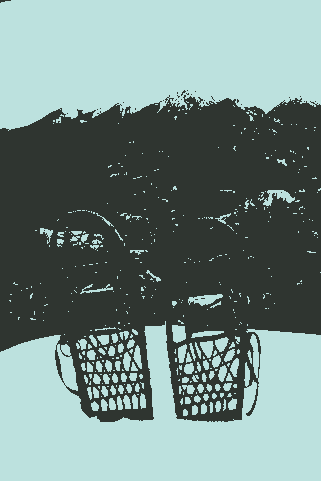

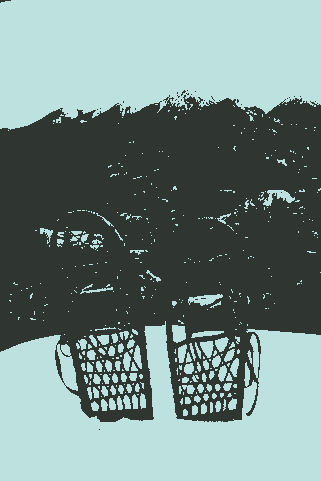

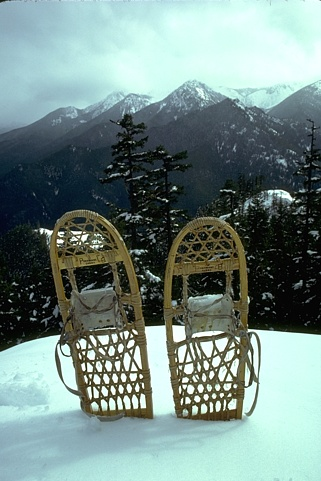

In [ ]:
# show the result
for images in img:
  cv2_imshow(images)

cv2_imshow(image)


In [ ]:
a=np.arange(9)
print(a)
print(a.reshape((-1,9)))


[0 1 2 3 4 5 6 7 8]
[[0 1 2 3 4 5 6 7 8]]
